In [1]:
from common_utils import (
    fix_randomness,
    generate_experiment1a_blobs,
    generate_experiment1b_blobs,
    plot_blob_data
)
from sklearn.cluster import HDBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from time import time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

seed = 42
fix_randomness(seed)

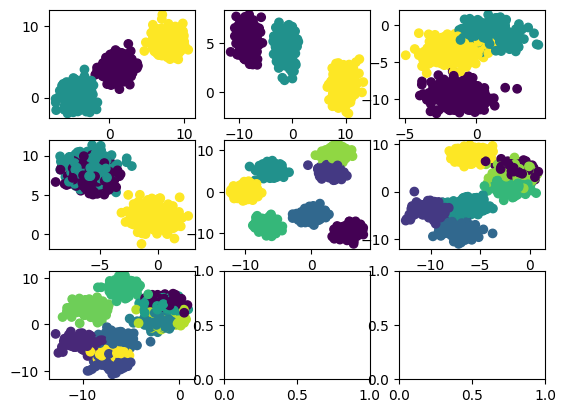

In [2]:
# Blobs for Experiment 1a
# First 3 blobs have 3 clusters
# Last 3 blobs have 7 clusters
blobs_1a = generate_experiment1a_blobs()
plot_blob_data(blobs_1a)

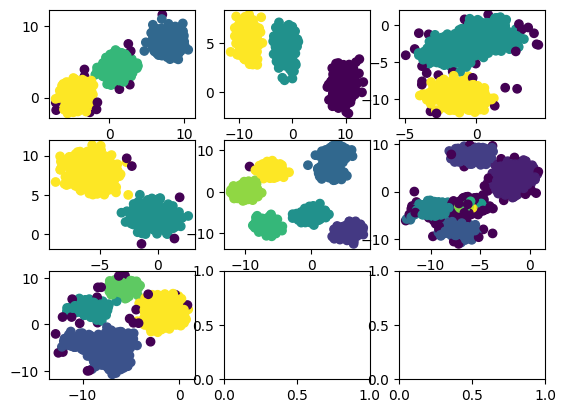

In [3]:
# HDBScan applied. Notice that cluster size is not a parameter
# Therefore, it can determine the number of clusters by itself.
# Moreover, it can also detect noise points -- its a modification
# of DBSCAN/OPTICS

# Label has been replaced with predictions
blobs_1a_with_predictions = list()

for blob in blobs_1a:
    hdb = HDBSCAN()
    blobs_1a_with_predictions.append(
        (
            blob[0],
            hdb.fit_predict(blob[0])
        )
    )

plot_blob_data(blobs_1a_with_predictions)

In [4]:
sample_sizes = [128, 256, 512, 1024, 2048, 4096]
cluster_counts = [4, 8, 16, 32, 64, 128]
n = 100

ss_blob_dict, cc_blob_dict = generate_experiment1b_blobs(
    seed,
    sample_sizes,
    cluster_counts,
    n
)

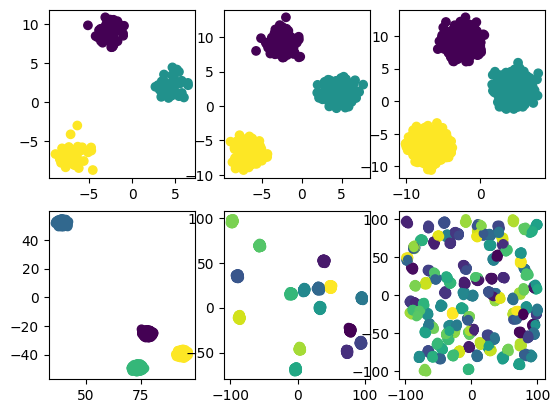

In [5]:
# Lets' take a plot of the representatives so that we have an idea of what's being generated
representative_blob_list = [
    ss_blob_dict[128][0], ss_blob_dict[512][0], ss_blob_dict[4096][0],
    cc_blob_dict[4][0], cc_blob_dict[16][0], cc_blob_dict[128][0],
]
plot_blob_data(representative_blob_list)

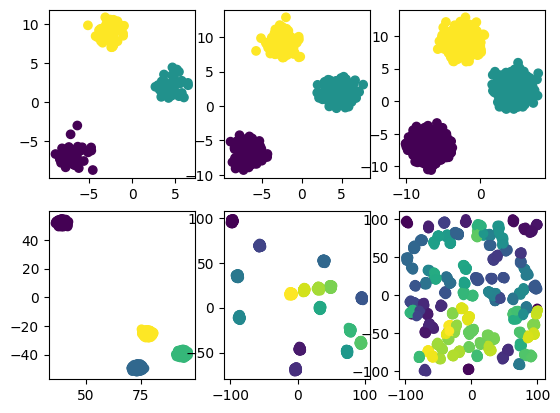

In [6]:
# See how these representatives are clustered
respresentative_with_predictions = list()

for blob in representative_blob_list:
    hdb = HDBSCAN()
    respresentative_with_predictions.append(
        (
            blob[0],
            hdb.fit_predict(blob[0])
        )
    )

plot_blob_data(respresentative_with_predictions)

0.7930601929228788
0.7303300665617907


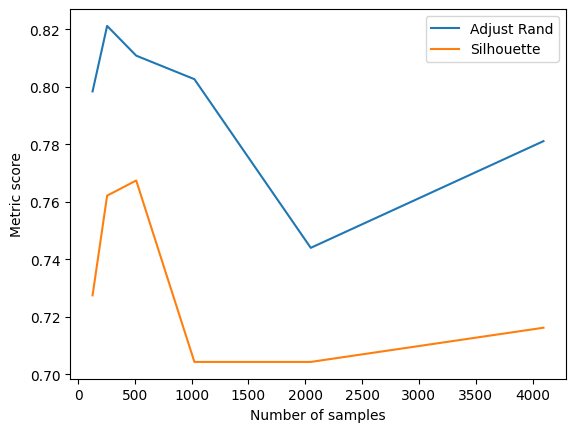

In [7]:
ss_ar_scores = list()
ss_sil_scores = list()
ss_average_times = list()
for ss in sample_sizes:
    sum_adjusted_rand = 0
    sum_sil = 0
    total_time = 0
    for blob in ss_blob_dict[ss]:
        start_time = time()
        hdb = HDBSCAN()
        pred = hdb.fit_predict(blob[0])
        sum_adjusted_rand += adjusted_rand_score(blob[1], pred)
        sum_sil += silhouette_score(blob[0], pred)
        total_time += time() - start_time
    average_adjusted_rand = sum_adjusted_rand / n
    average_sil = sum_sil / n
    average_time = total_time / n

    ss_ar_scores.append(average_adjusted_rand)
    ss_sil_scores.append(average_sil)
    ss_average_times.append(average_time)

ss_overall_average_ar = sum(ss_ar_scores)/len(sample_sizes)
print(ss_overall_average_ar)

ss_overall_average_sil = sum(ss_sil_scores)/len(sample_sizes)
print(ss_overall_average_sil)

plt.xlabel("Number of samples")
plt.ylabel("Metric score")

plt.plot(sample_sizes, ss_ar_scores, label="Adjusted Rand")
plt.plot(sample_sizes, ss_sil_scores, label="Silhouette")

plt.legend()
plt.show()
# No apparent pattern for different sample sizes

0.9579986342861356
0.8815017970334734


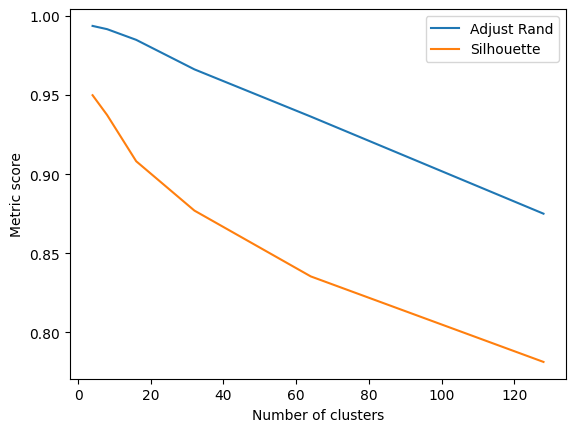

In [8]:
cc_ar_scores = list()
cc_sil_scores = list()
cc_average_times = list()
for cc in cluster_counts:
    sum_adjusted_rand = 0
    sum_sil = 0
    total_time = 0
    for blob in cc_blob_dict[cc]:
        start_time = time()
        hdb = HDBSCAN()
        pred = hdb.fit_predict(blob[0])
        sum_adjusted_rand += adjusted_rand_score(blob[1], pred)
        sum_sil += silhouette_score(blob[0], pred)
        total_time += time() - start_time
    average_adjusted_rand = sum_adjusted_rand / n
    average_sil = sum_sil / n
    average_time = total_time / n

    cc_ar_scores.append(average_adjusted_rand)
    cc_sil_scores.append(average_sil)
    cc_average_times.append(average_time)

cc_overall_average_ar = sum(cc_ar_scores)/len(sample_sizes)
print(cc_overall_average_ar)

cc_overall_average_sil = sum(cc_sil_scores)/len(sample_sizes)
print(cc_overall_average_sil)

plt.xlabel("Number of clusters")
plt.ylabel("Metric score")

plt.plot(cluster_counts, cc_ar_scores, label="Adjusted Rand")
plt.plot(cluster_counts, cc_sil_scores, label="Silhouette")

plt.legend()
plt.show()
# Adjusted rand score and silhouette score decrease as the number
# of cluster increases
# Possible explanations are that HDBSCAN performance worsens as
# number of clusters increase or
# the way we generate the data might be the reason for this degradation

In [9]:
hdbscan_average_ar = (cc_overall_average_ar + ss_overall_average_ar)/2
hdbscan_average_sil = (cc_overall_average_sil + ss_overall_average_sil)/2
hdbscan_average_ar, hdbscan_average_sil

(0.8755294136045072, 0.8059159317976321)

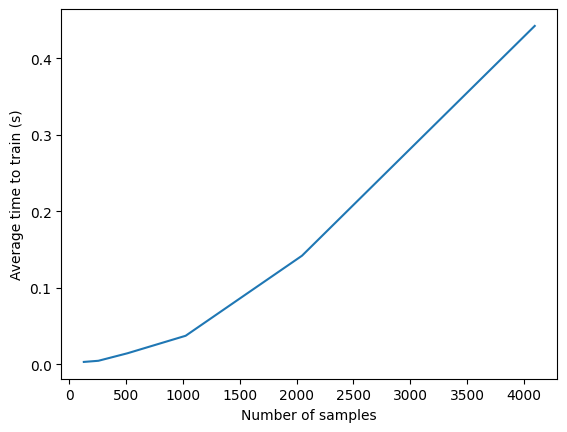

In [10]:
plt.xlabel("Number of samples")
plt.ylabel("Average time to train (s)")
plt.plot(sample_sizes, ss_average_times)
# Possibly O(n^2) complexity

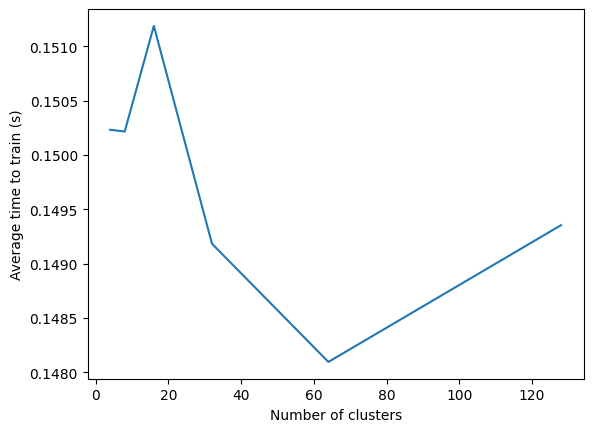

In [11]:
plt.xlabel("Number of clusters")
plt.ylabel("Average time to train (s)")
plt.plot(cluster_counts, cc_average_times)
# Complexity is not apparent, plateau at around 20 clusters